In [342]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,4)
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = 16

import dask.dataframe as dd
import pandas as pd
import numpy as np
import time

import plotly.io as pio
pio.renderers.default = 'notebook'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [649]:
# from dope.fetcher.coingecko import CoinGecko
# cg = CoinGecko()
# tokens = cg.get_token_list()
# tokens[tokens.symbol.apply(lambda x: "rsweth" == x)]

In [344]:
from dope.pools.pools import Pool
from dope.backengine.maestro import BackEngineMaestro

In [652]:
maestro = BackEngineMaestro()
pools = [
  Pool(
    chain="Ethereum",
    symbol="cbETH-ETH",
    protocol="AaveV3",
    ltv=0.73,
    LT=0.78,
    deposit_token="cbETH",
    deposit_token_keyid="coinbase-wrapped-staked-eth",
    deposit_pool_id="fdf02dc0-c38d-4850-8d61-74668d281325",

    debt_token="ETH",
    debt_token_keyid="ethereum",
    debt_pool_id="e880e828-ca59-4ec6-8d4f-27182a4dc23d",
  ),
  
  Pool(
    chain="Ethereum",
    symbol="wstETH-ETH",
    protocol="AaveV3",
    ltv=0.93,
    LT=0.95,
    deposit_token="wstETH",
    deposit_token_keyid="wrapped-steth",
    deposit_pool_id="e6435aae-cbe9-4d26-ab2c-a4d533db9972",

    debt_token="ETH",
    debt_token_keyid="ethereum",
    debt_pool_id="e880e828-ca59-4ec6-8d4f-27182a4dc23d",
  ),
  
  Pool(
    chain="Ethereum",
    symbol="rETH-ETH",
    protocol="AaveV3",
    ltv=0.75,
    LT=0.79,
    deposit_token="rETH",
    deposit_token_keyid="rocket-pool-eth",
    deposit_pool_id="f1a22245-a1f1-4389-8ff2-dde4914b272d",

    debt_token="ETH",
    debt_token_keyid="ethereum",
    debt_pool_id="e880e828-ca59-4ec6-8d4f-27182a4dc23d",
  ),
  
  
  Pool(
    chain="Ethereum",
    symbol="wstETH-ETH",
    protocol="Euler",
    ltv=0.91,
    LT=0.93,

    deposit_token="wstETH",
    deposit_token_keyid="wrapped-steth",
    deposit_pool_id="f51d845a-6979-4ccb-b73f-4738a753dd85",

    debt_token="ETH",
    debt_token_keyid="ethereum",
    debt_pool_id="e30876ae-e9d3-4ab1-bf5b-96920f4fc9ba",
  ),
  
]

In [653]:
# Download data
_ = maestro.load_pools_data(pools)

Ethereum:aave-v3:WETH e880e828-ca59-4ec6-8d4f-27182a4dc23d 589 589
Ethereum:aave-v3:CBETH fdf02dc0-c38d-4850-8d61-74668d281325 589 589
Ethereum:aave-v3:WSTETH e6435aae-cbe9-4d26-ab2c-a4d533db9972 589 589
Ethereum:aave-v3:RETH f1a22245-a1f1-4389-8ff2-dde4914b272d 589 589
Ethereum:euler-v2:EWETH-2 e30876ae-e9d3-4ab1-bf5b-96920f4fc9ba 107 107
Ethereum:euler-v2:EWSTETH-2 f51d845a-6979-4ccb-b73f-4738a753dd85 107 107


In [654]:
# Download price data
maestro.load_price_data(pools)

Data for ethereum with 366 rows
Data for coinbase-wrapped-staked-eth with 366 rows
Data for wrapped-steth with 366 rows
Data for rocket-pool-eth with 366 rows


In [655]:
#maestro.convert_data_to_base_token("WETH")

In [656]:
dash = LoopDashboard(maestro=maestro)
dash.setup()

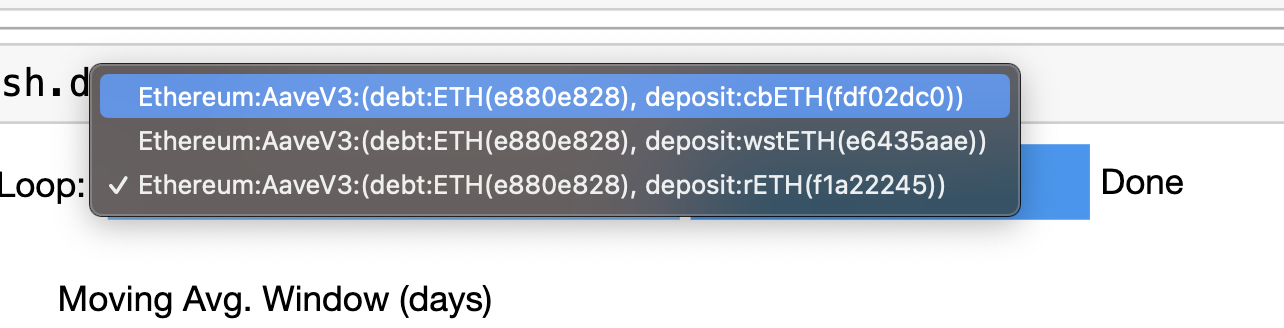

In [657]:
dash.display()

FigureWidget({
    'data': [],
    'layout': {'height': 850,
               'template': '...',
               'title': {'text': 'Looping APY Timeseries'},
               'width': 950,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'matches': 'x4', 'showticklabels': False},
               'xaxis2': {'anchor': 'y2', 'domain': [0.0, 1.0], 'matches': 'x4', 'showticklabels': False},
               'xaxis3': {'anchor': 'y3', 'domain': [0.0, 1.0], 'matches': 'x4', 'showticklabels': False},
               'xaxis4': {'anchor': 'y4', 'domain': [0.0, 1.0], 'title': {'text': 'Date'}},
               'yaxis': {'anchor': 'x', 'domain': [0.66, 1.0], 'title': {'text': 'APY'}},
               'yaxis2': {'anchor': 'x2',
                          'domain': [0.44000000000000006, 0.6100000000000001],
                          'title': {'text': 'Cum. Returns (%)'}},
               'yaxis3': {'anchor': 'x3',
                          'domain': [0.22000000000000003, 0.39],
                     

In [607]:
# df = dash.on_change(return_raw=True)